<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/recreate_interst_principle_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreate Interest vs Principal Graph (Practice)
- Lisa Broadhead
- June 6, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "/content/drive/MyDrive/Colab Notebooks/coding_dojo/files/mortgages.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


## 1. Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.

In [7]:
mortgage_thirty = df['Mortgage Name'] == "30 Year"
len(df[mortgage_thirty])

720

## 2. Create a filter for an interest rate of 3% (notice how it is written in the data!).  

In [10]:
three_percent = df['Interest Rate'] == 0.03
df[three_percent]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
895,176,13706.74,2762.33,34.26,2728.07,10978.67,15 Year,0.03
896,177,10978.67,2762.33,27.44,2734.89,8243.78,15 Year,0.03
897,178,8243.78,2762.33,20.60,2741.73,5502.05,15 Year,0.03
898,179,5502.05,2762.33,13.75,2748.58,2753.47,15 Year,0.03


In [11]:
len(df[three_percent])

540

## 3. Define a new dataframe based on both the year and the interest filters you have created.  

In [21]:
three_df = df[mortgage_thirty & three_percent]

In [22]:
three_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


## 4. We have a choice for the 5% interest rate: 

In [23]:
five_interest = df['Interest Rate'] == 0.05

In [24]:
five_df = df[mortgage_thirty & five_interest]

## Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().  What are the first three values in the output for the cumulative sum of the 3% rate?

In [37]:
x = three_df['Interest Rate'].cumsum()
three_df['Interest Rate'].cumsum()

0       0.03
1       0.06
2       0.09
3       0.12
4       0.15
       ...  
355    10.68
356    10.71
357    10.74
358    10.77
359    10.80
Name: Interest Rate, Length: 360, dtype: float64

In [46]:
xx = five_df['Interest Rate'].cumsum()
five_df['Interest Rate'].cumsum()


360     0.05
361     0.10
362     0.15
363     0.20
364     0.25
       ...  
715    17.80
716    17.85
717    17.90
718    17.95
719    18.00
Name: Interest Rate, Length: 360, dtype: float64

## 6. Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'

In [40]:
three_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [44]:
y = three_df['Month']

In [48]:
yy = five_df['Month']

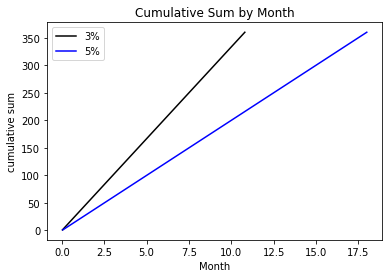

In [70]:
plt.title("Cumulative Sum by Month")
plt.plot(x,y, c='k')
plt.xlabel("Month")
plt.ylabel("cumulative sum")
plt.plot(xx, yy, c="b")
plt.legend(["3%", "5%"])